<a href="https://colab.research.google.com/github/jasmineyz/hr_analytics_prediction/blob/main/HR_Analytics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**Background**

Employee attrition is one of the most critical challenges faced by organizations, as it directly impacts productivity, costs, and workplace culture. HR Analytics provides an opportunity to interpret organizational data, identify people-related trends, and support HR personnel in taking data-driven actions to retain employees.  

The goal of this project is to leverage HR Analytics and machine learning to **predict employee attrition**. By cleaning, visualizing, and modeling HR data, this project aims to uncover key factors influencing attrition and provide actionable insights for HR decision-making.  

**Approach**

- Data Cleaning  
  - Delete redundant columns  
  - Rename columns for consistency  
  - Drop duplicate records  
  - Clean individual columns (standardize values, handle inconsistencies)  
  - Remove NaN values  
  - Apply necessary transformations for analysis  

- Data Visualization & Exploratory Data Analysis
  - Perform **EDA** to understand data distributions and detect anomalies  
  - Plot correlation map for numeric variables  
  - Visualize categorical features such as:  
    - Overtime  
    - Marital Status  
    - Job Role  
    - Gender  
    - Education Field  
    - Department  
    - Business Travel  
  - Explore key relationships:  
    - Overtime vs. Age  
    - Total Working Years vs. Attrition  
    - Education Level vs. Attrition  
    - Number of Companies Worked vs. Attrition  
    - Distance from Home vs. Attrition  

- Machine Learning Modeling  
  - Feature engineering and preprocessing  
  - Apply **Principal Component Analysis (PCA)** for dimensionality reduction and visualization  
  - Build predictive models (e.g., Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, etc.)  
  - Evaluate models using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC  
  - Interpret model results to highlight key drivers of attrition  

# Step 1: Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Step 2: Loading Dataset

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file
file_path = "HR-Employee-Attrition.csv"

# Load the latest version
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rishikeshkonapure/hr-analytics-prediction",
    file_path
)

print(f"Shape of the dataset: {data.shape}") # There are 35 variables and 1,470 employee records.

Using Colab cache for faster access to the 'hr-analytics-prediction' dataset.
Shape of the dataset: (1470, 35)


In [ ]:
print("First 5 records:")
data.head()

First 5 records:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(list(data.columns))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Column Explanation

* **Age**: Age of the employee in years  
* **Attrition**: Whether the employee has left the company  
* **BusinessTravel**: Frequency of job-related travel  
* **DailyRate**: Daily pay rate of the employee  
* **Department**: Department in which the employee works  
* **DistanceFromHome**: Distance from home to workplace  
* **Education**: Employee’s education level  
* **EducationField**: Field of study in which the employee was educated  
* **EmployeeCount**: Number of employees (usually 1 for this dataset)  
* **EmployeeNumber**: Unique employee identifier  
* **EnvironmentSatisfaction**: Employee’s satisfaction with their work environment  
* **Gender**: Gender of the employee  
* **HourlyRate**: Hourly pay rate of the employee  
* **JobInvolvement**: Employee’s level of involvement in their job  
* **JobLevel**: Employee’s job level or rank  
* **JobRole**: Specific role or position of the employee  
* **JobSatisfaction**: Employee’s satisfaction with their job  
* **MaritalStatus**: Marital status of the employee  
* **MonthlyIncome**: Monthly salary of the employee  
* **MonthlyRate**: Monthly rate (can differ from income due to bonuses, etc.)  
* **NumCompaniesWorked**: Number of previous companies the employee has worked for  
* **Over18**: Whether the employee is over 18 years old  
* **OverTime**: Whether the employee works overtime  
* **PercentSalaryHike**: Percentage increase in salary  
* **PerformanceRating**: Performance rating of the employee  
* **RelationshipSatisfaction**: Employee’s satisfaction with workplace relationships  
* **StandardHours**: Standard hours worked per week (usually 40)  
* **StockOptionLevel**: Level of stock options awarded  
* **TotalWorkingYears**: Total years of professional experience  
* **TrainingTimesLastYear**: Number of training sessions attended in the last year  
* **WorkLifeBalance**: Employee’s work-life balance rating  
* **YearsAtCompany**: Number of years the employee has been at the company  
* **YearsInCurrentRole**: Number of years in the current role  
* **YearsSinceLastPromotion**: Years since the last promotion  
* **YearsWithCurrManager**: Years working with the current manager  

# Step 3: Data Cleaning

## 3.1 Basic data discovery

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [ ]:
## Standardize column names

import re
data.columns = [re.sub(r'(?<=[a-z])([A-Z])', r'_\1',i).lower() for i in data.columns]

data.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

## 3.2 Check missing values and dropping unnecessary columns


In [ ]:
data.info() # there is no missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  environment_satisfaction    1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

In [ ]:
data.duplicated().any() # there is no duplicate record.

np.False_

In [ ]:
def check_unique(data):
    return pd.DataFrame({
        "unique_count": data.nunique(),
        "unique_values": data.apply(lambda col: col.unique().tolist())
    })

check_unique(data)

,unique_count,unique_values
age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
attrition,2,"[Yes, No]"
business_travel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
daily_rate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
department,3,"[Sales, Research & Development, Human Resources]"
distance_from_home,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
education,5,"[2, 1, 4, 3, 5]"
education_field,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
employee_count,1,[1]
employee_number,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


**Data is cleaned and contains no missing values.**

Since the number of columns is overwhelming, it is reasonable to retain only the most relevant features for our analytical purposes:

* In the previous code, we see **`employee_count`**, **`over18`**, and **`standard_hours`** consist of a single constant value across all entries, so they can be omitted.  
* **`employee_number`** is a unique identifier for each employee and does not convey any descriptive characteristics, so it can be omitted.
* **`monthly_rate`**, **`daily_rate`**, and **`hourly_rate`** will be removed because **`monthly_income`** is a more stable and directly interpretable measure of monthly salary, making **`monthly_rate`** redundant for analysis.
* **`performance_rating`** contains only two values (3 and 4), suggesting its limited utility in this analytical process.


In [ ]:
data.drop(['employee_count', 'standard_hours', 'over18', 'employee_number', 'monthly_rate', 'daily_rate', 'hourly_rate', 'performance_rating'],
            axis=1,inplace=True)

## 3.3 Check Outliers

In [ ]:
!pip install -q kaleido

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image
import os

# --- Configuration ---
n_cols = 3  # number of histograms per row
os.makedirs("plots", exist_ok=True)  # optional folder for saved images

# --- Numeric / Ordinal Columns ---
numeric_cols = data.select_dtypes(include='number').columns
n_rows_num = (len(numeric_cols) + n_cols - 1) // n_cols

fig_num = make_subplots(
    rows=n_rows_num,
    cols=n_cols,
    subplot_titles=numeric_cols
)

row = col = 1
for column in numeric_cols:
    fig_num.add_trace(
        go.Histogram(
            x=data[column],
            nbinsx=30,
            name=column,
            marker_color='steelblue',
            opacity=0.8
        ),
        row=row, col=col
    )
    col += 1
    if col > n_cols:
        col = 1
        row += 1

fig_num.update_layout(
    height=400*n_rows_num,
    width=400*n_cols,
    showlegend=False,
    title_text="Histograms of Numeric / Ordinal Columns"
)

# --- Show and save numeric figure ---
fig_num.show()
#fig_num_path = "plots/fig_num.png"
#fig_num.write_image(fig_num_path, scale=2)
#display(Image(fig_num_path))

# --- Categorical / Ordinal Columns ---
categorical_cols = data.select_dtypes(exclude='number').columns
n_rows_cat = (len(categorical_cols) + n_cols - 1) // n_cols

fig_cat = make_subplots(
    rows=n_rows_cat,
    cols=n_cols,
    subplot_titles=categorical_cols
)

row = col = 1
for column in categorical_cols:
    fig_cat.add_trace(
        go.Histogram(
            x=data[column],
            name=column,
            marker_color='mediumseagreen',
            opacity=0.8
        ),
        row=row, col=col
    )
    col += 1
    if col > n_cols:
        col = 1
        row += 1

fig_cat.update_layout(
    height=400*n_rows_cat,
    width=400*n_cols,
    showlegend=False,
    title_text="Histograms of Categorical / Ordinal Columns"
)

# --- Show and save categorical figure ---
fig_cat.show()
#fig_cat_path = "plots/fig_cat.png"
#fig_cat.write_image(fig_cat_path, scale=2)
#display(Image(fig_cat_path))

- From the histograms, no extreme outliers are apparent and the numeric values appear to be within reasonable ranges.

# **Step 4: Data Visualization & Exploratory Data Analysis**

## 4.1. Categorical / Ordinal Variables

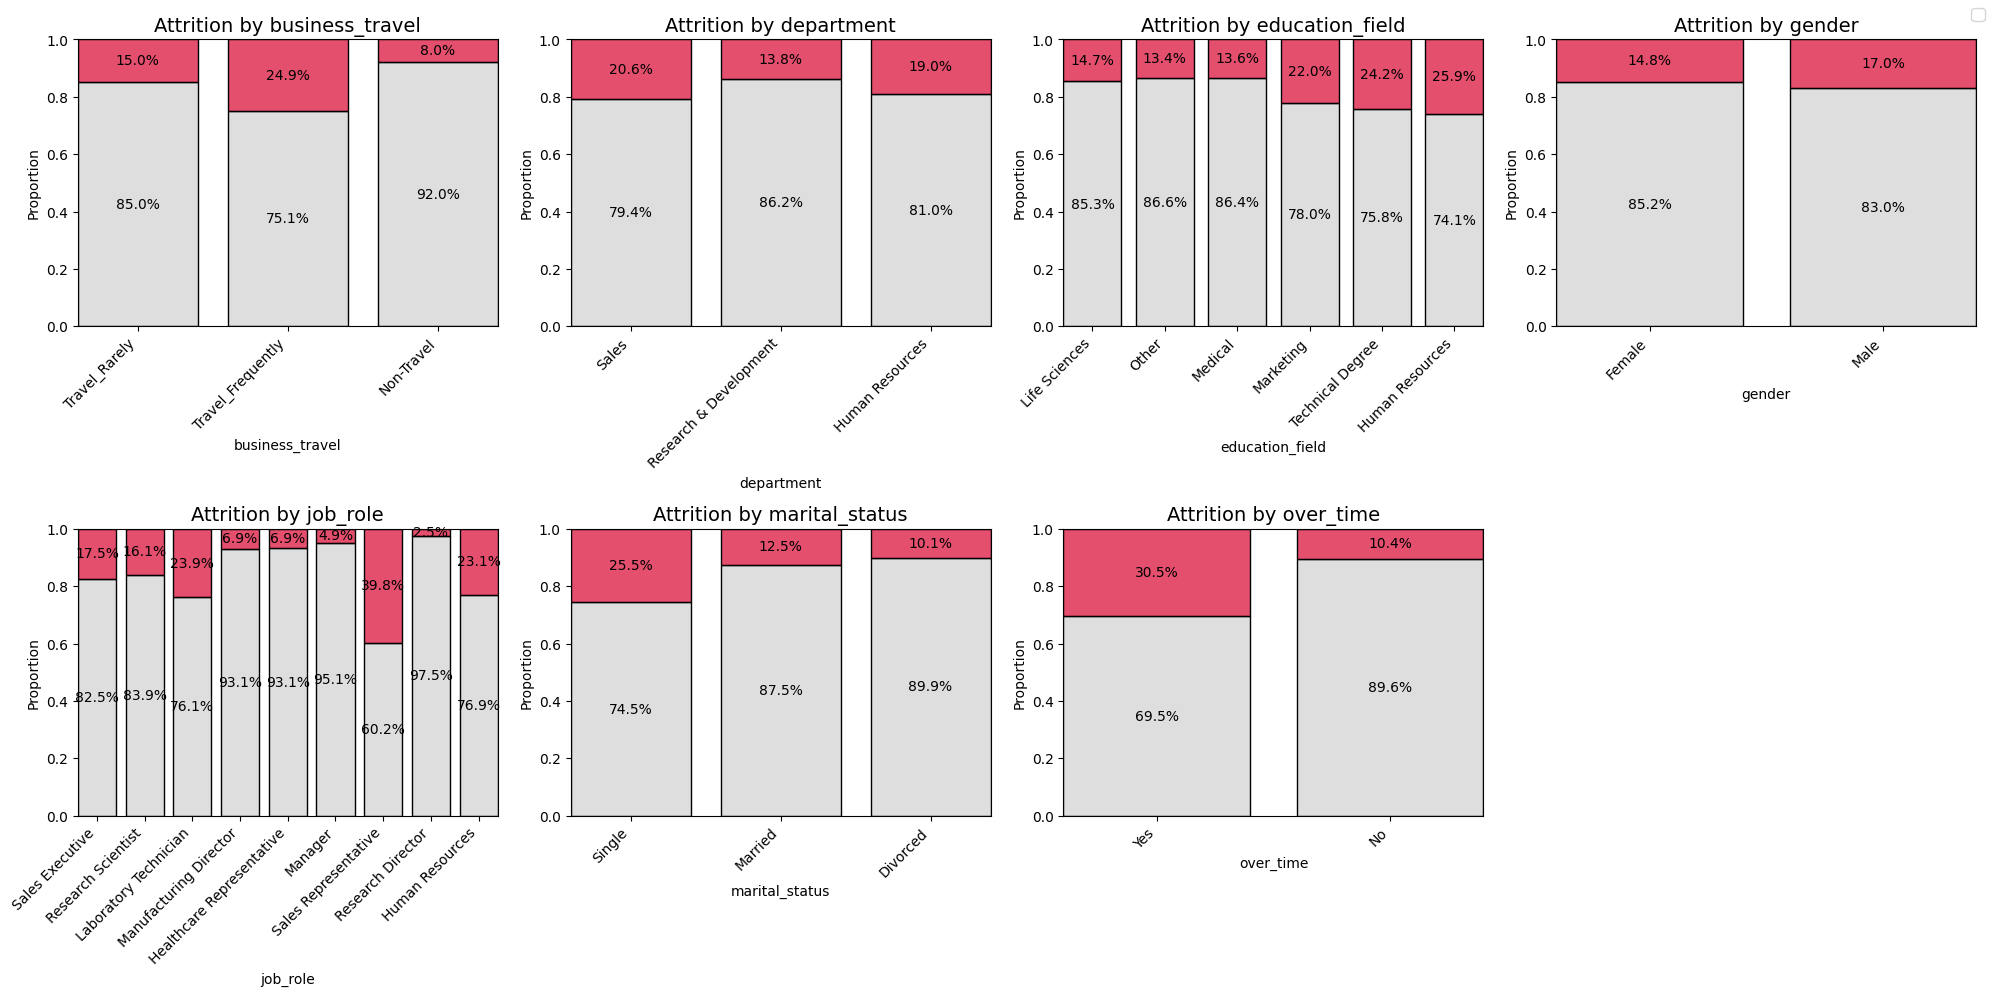

In [ ]:
# Define custom colors for Attrition
custom_palette = {'Yes': 'crimson',   # standout color
                  'No': 'lightgray'}  # mild color

categorical_cols = [col for col in categorical_cols if col != "attrition"]

n_cols = 4
n_rows = -(-len(categorical_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# Ensure axes is a 1D array for easy iteration
if n_rows * n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Draw stacked bar chart
    sns.histplot(
        data=data,
        x=col,
        hue="attrition",
        multiple="fill",
        palette=custom_palette,
        shrink=0.8,
        hue_order=['Yes','No'],
        stat='probability',
        ax=ax,
        legend=False  # Hide individual subplot legend
    )

    ax.set_title(f"Attrition by {col}", fontsize=14)
    ax.set_ylabel("Proportion")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Annotate each stacked bar segment with percentage
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width()/2,
                y=p.get_y() + height/2,
                s=f"{height*100:.1f}%",
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

# Remove empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


**Key Attrition Observations**

- **Overtime**  
  Employees working overtime face a **30.5% attrition rate**, nearly triple that of non-overtime employees (10.4%). Burnout and work–life imbalance appear to be major drivers.  

- **Marital Status**  
  **Single employees** have the highest attrition (25.5%), compared to **married (12.5%)** and **divorced (10.1%)**, hinting at differences in priorities or support systems.  

- **Job Roles**  
  - **Sales Representatives** show the highest attrition (39.8%).  
  - **Managers (4.9%)** and **Research Directors (2.5%)** have the lowest attrition, reflecting stability in leadership roles.  

- **Business Travel**  
  Frequent travelers experience **24.9% attrition**, versus **8.0%** for non-travelers, pointing to fatigue or personal disruption.  

- **Education Field**  
  Employees with **Human Resources (25.9%)** or **Technical Degrees (24.2%)** face higher attrition, possibly due to role mismatch or unmet expectations.  

- **Gender**  
  **Male employees (17.0%)** show slightly higher attrition than **females (14.8%)**, though the gap is modest.  

- **Departments**  
  Attrition is highest in **Sales (20.6%)**, followed by **Human Resources (19.0%)**, and **Research & Development (13.8%)**.  


Attrition is shaped by workload, role type, travel demands, and personal circumstances. Targeting high-risk groups such as **Sales Representatives, frequent travelers, and overtime workers** offers the most immediate opportunity to reduce turnover.  


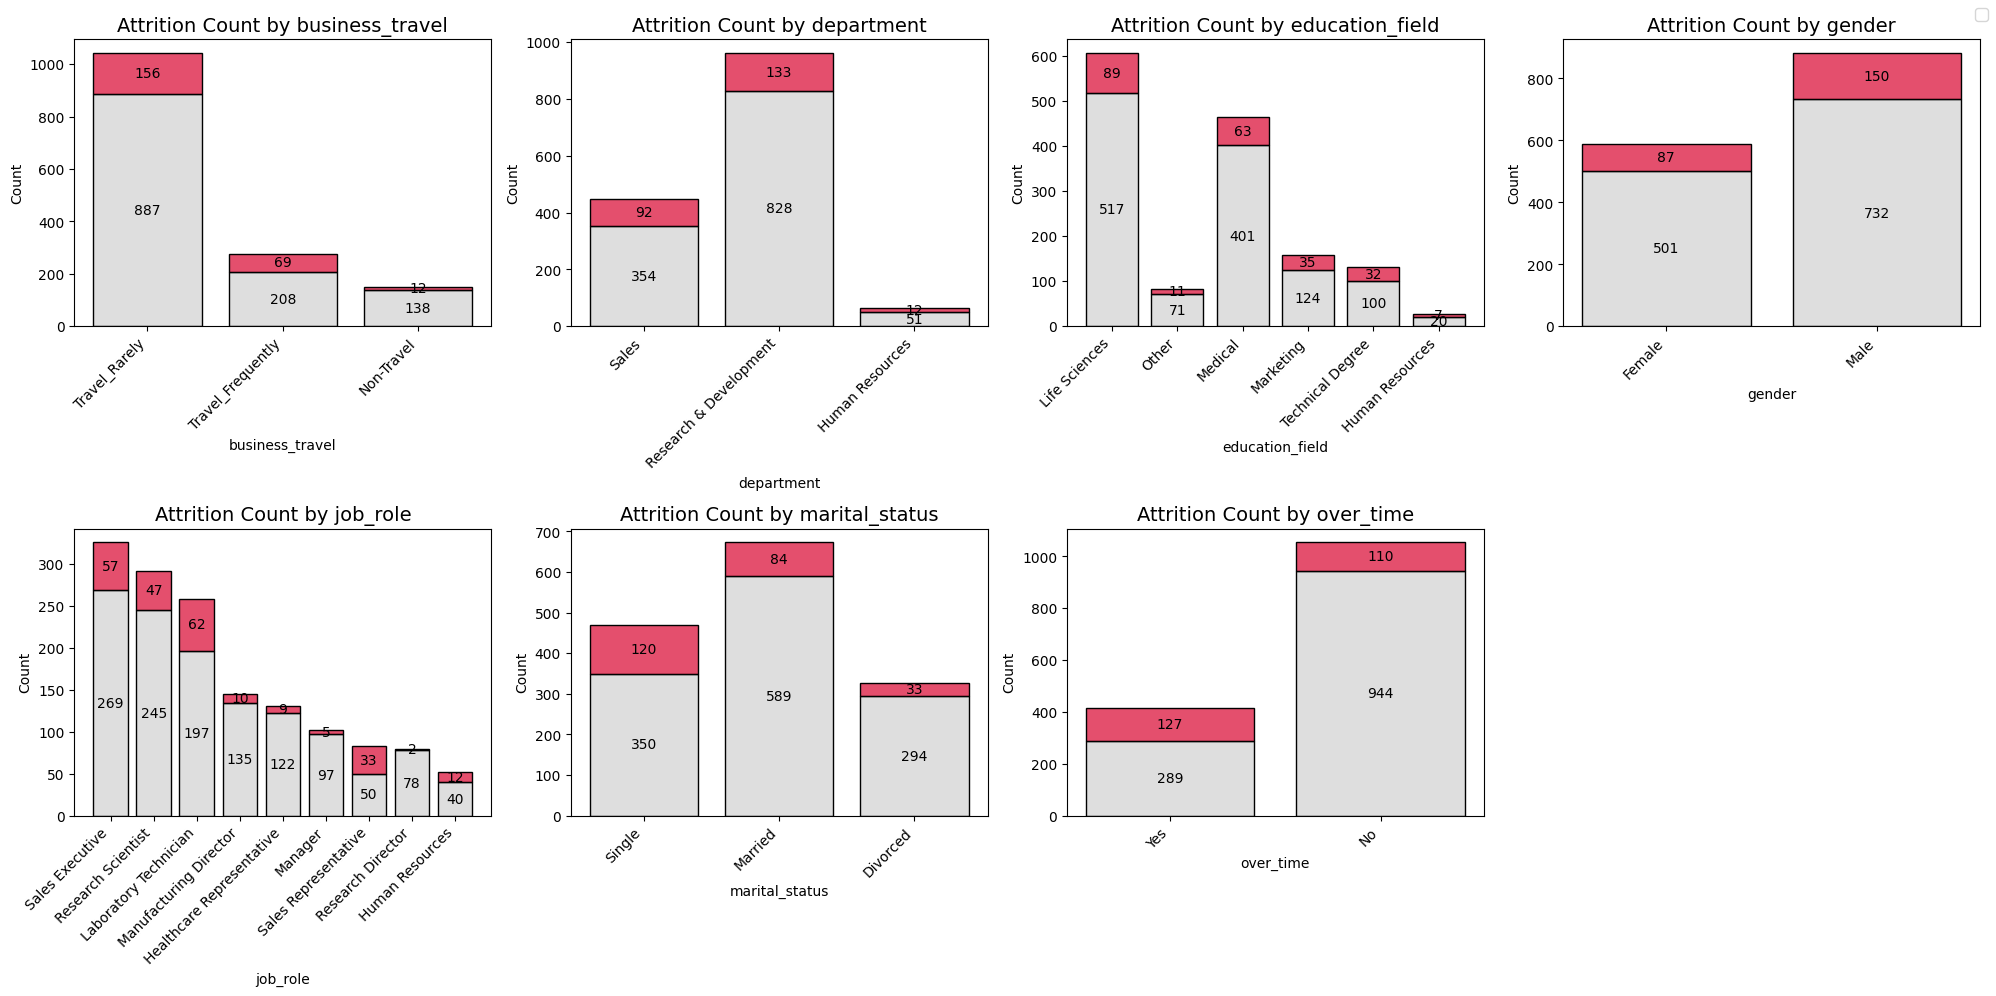

In [ ]:
categorical_cols = [col for col in categorical_cols if col != "attrition"]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# Ensure axes is a 1D array for easy iteration
if n_rows * n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Draw stacked bar chart based on counts
    sns.histplot(
        data=data,
        x=col,
        hue="attrition",
        multiple="stack",  # count-based stacking
        palette=custom_palette,
        shrink=0.8,
        hue_order=['Yes','No'],
        stat='count',
        ax=ax,
        legend=False  # Hide individual subplot legend
    )

    ax.set_title(f"Attrition Count by {col}", fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Annotate each stacked bar segment with counts
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width()/2,
                y=p.get_y() + height/2,
                s=f"{int(height)}",
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

# Remove empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


This graph shows the **count (n)**, complementing the **percentage (%)** view in the previous chart.  
The purpose is to provide the **absolute numbers** behind the percentages for clearer context.  

## 4.2. Numeric / Ordinal Variables



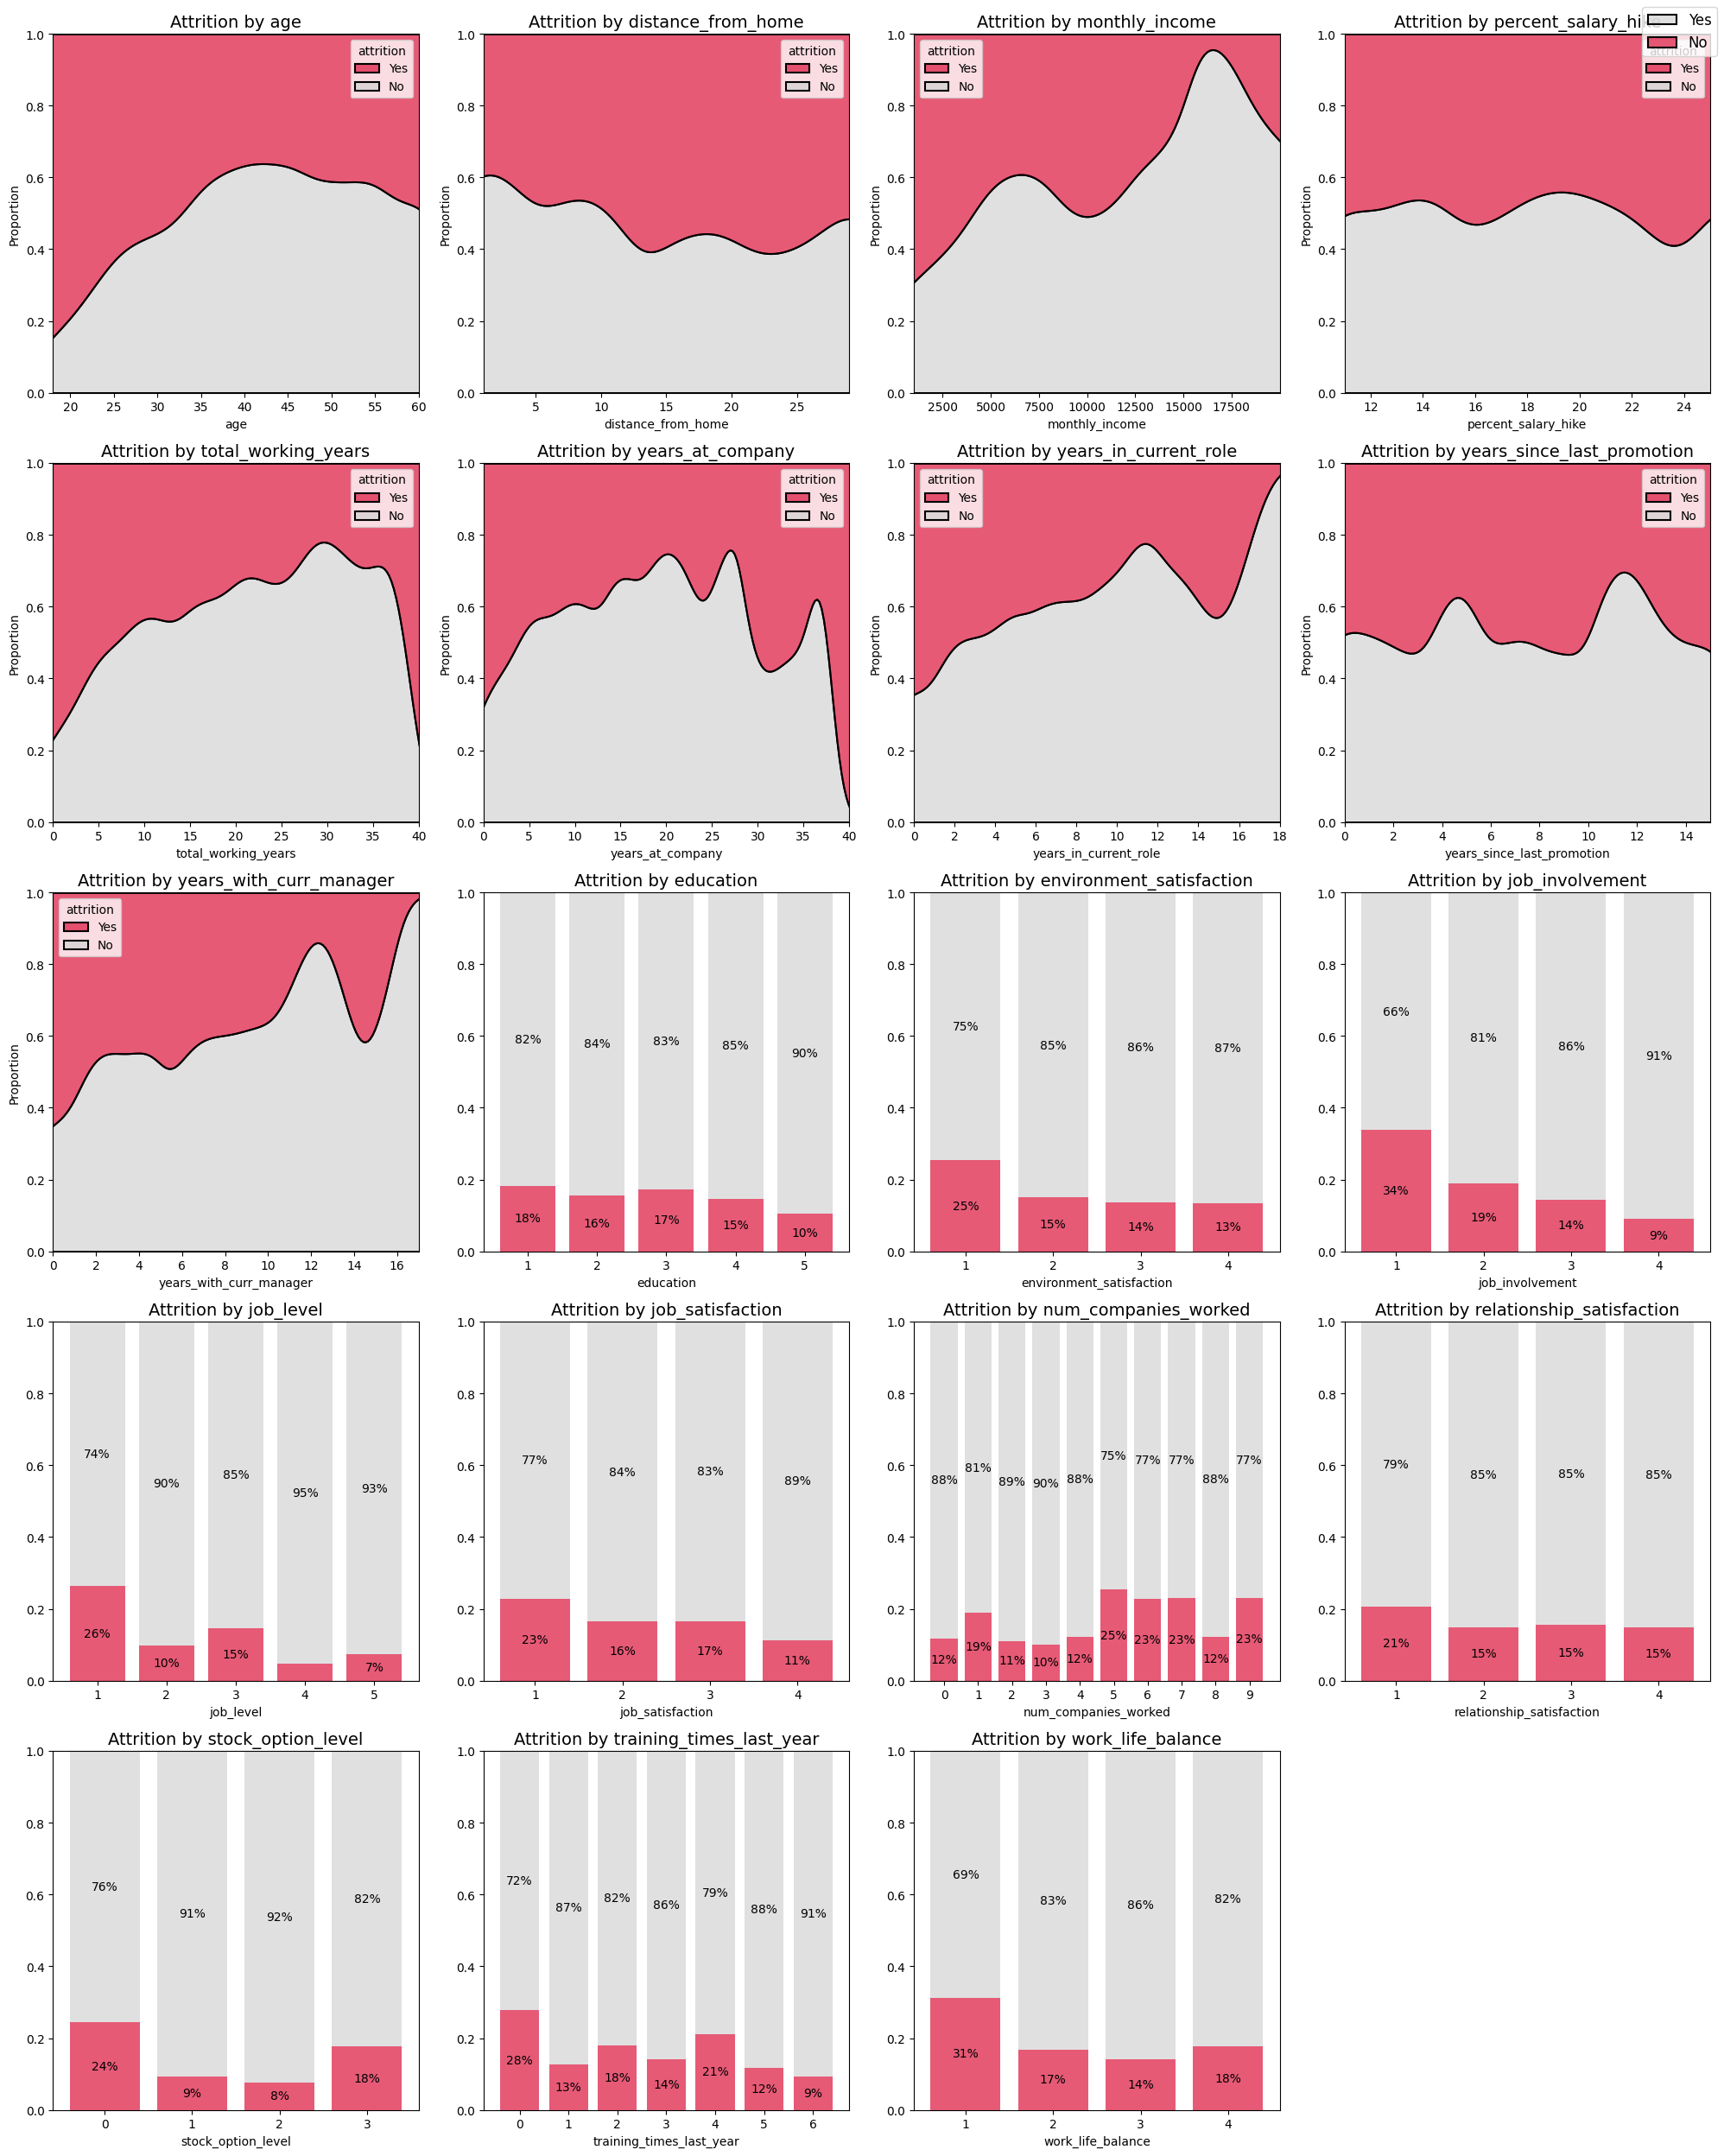

In [ ]:
# Define ordinal columns
ordinal_cols = [
    'education', 'environment_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction',
    'num_companies_worked', 'relationship_satisfaction',
    'stock_option_level', 'training_times_last_year', 'work_life_balance'
]

# Detect continuous columns
continuous_cols = [col for col in data.select_dtypes(include='number').columns if col not in ordinal_cols]

# Combine both types of numeric columns
numeric_cols_ordered = continuous_cols + ordinal_cols

# Plot configuration
n_cols = 4
n_rows = -(-len(numeric_cols_ordered) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

# Plotting loop
for i, col in enumerate(numeric_cols_ordered):
    ax = axes[i]

    if col in continuous_cols:
        # Stacked density plot for continuous features
        sns.kdeplot(
            data=data,
            x=col,
            hue='attrition',
            multiple='fill',
            common_norm=False,
            palette=custom_palette,
            alpha=0.7,
            ax=ax,
            linewidth=1.5
        )
        ax.set_ylabel("Proportion")
        ax.set_xlim(data[col].min(), data[col].max())  # Clamp x-axis to data range

    else:
        # Stacked bar plot for ordinal features
        counts_yes = data[data['attrition'] == 'Yes'][col].value_counts().sort_index()
        counts_no = data[data['attrition'] == 'No'][col].value_counts().sort_index()
        all_idx = sorted(set(counts_yes.index) | set(counts_no.index))
        counts_yes = counts_yes.reindex(all_idx, fill_value=0)
        counts_no = counts_no.reindex(all_idx, fill_value=0)
        total = counts_yes + counts_no
        prop_yes = counts_yes / total
        prop_no = counts_no / total

        ax.bar(all_idx, prop_yes, color=custom_palette['Yes'], alpha=0.7, label='Yes')
        ax.bar(all_idx, prop_no, bottom=prop_yes, color=custom_palette['No'], alpha=0.7, label='No')

        # Add percentage labels inside bars
        for idx, val in enumerate(all_idx):
            total_count = total.iloc[idx]
            if total_count == 0:
                continue
            yes_pct = prop_yes.iloc[idx] * 100
            no_pct = prop_no.iloc[idx] * 100
            if yes_pct > 5:
                ax.text(val, prop_yes.iloc[idx] / 2, f"{yes_pct:.0f}%", ha='center', va='center', fontsize=10)
            if no_pct > 5:
                ax.text(val, prop_yes.iloc[idx] + prop_no.iloc[idx] / 2, f"{no_pct:.0f}%", ha='center', va='center', fontsize=10)

        # Fix x-axis to show only actual values
        ax.set_xticks(all_idx)
        ax.set_xticklabels(all_idx)

    # Common formatting
    ax.set_title(f"Attrition by {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x')

# Remove unused subplots
for j in range(len(numeric_cols_ordered), len(axes)):
    fig.delaxes(axes[j])

# Add legend and layout
fig.legend(['Yes', 'No'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


The figure shows how the proportion of employees leaving ("Yes") versus staying ("No") varies across different factors.  

**Continuous Variables (Stacked Area Plots)**
- **Age**: Higher attrition among younger employees, decreasing in the 30s, with another rise in later years.  
- **Distance from Home**: Attrition remains relatively stable across distances.  
- **Monthly Income**: Lower-income employees show higher attrition; attrition decreases as income rises.  
- **Percent Salary Hike**: Attrition remains fairly consistent across salary hikes.  
- **Total Working Years**: Employees with fewer years of experience have higher attrition; attrition declines with more years.  
- **Years at Company**: Attrition is higher for newer employees and stabilizes with tenure.  
- **Years in Current Role**: Attrition is higher in early years of the role and decreases over time.  
- **Years Since Last Promotion**: Attrition increases with longer time since last promotion.  
- **Years with Current Manager**: Attrition is higher in the early period with a manager, then decreases over time.  


**Ordinal Variables (Stacked Bar Plots)**
- **Education**: Attrition rates are consistent (13-18%) across education levels.  
- **Environment Satisfaction**: Lowest satisfaction (1) → 25% attrition; higher satisfaction → 14-17% attrition.  
- **Job Involvement**: Very high attrition (34%) at low involvement, dropping to 4% at high involvement.  
- **Job Level**: High attrition at lower levels (up to 26%) and very low attrition at higher levels (as low as 5%).  
- **Job Satisfaction**: Higher satisfaction reduces attrition (down to 11%).  
- **Number of Companies Worked**: Attrition generally ranges 17-23%.  
- **Relationship Satisfaction**: Higher satisfaction is linked to lower attrition.  
- **Stock Option Level**: Attrition highest at 0 stock options (24%) and lowest when stock options are provided.  
- **Training Times Last Year**: More frequent training slightly reduces attrition.  
- **Work–Life Balance**: Poor balance (31% attrition) vs. good balance (14-18% attrition).  

**Key Takeaways**
- Younger, newer, and lower-level employees are more likely to leave.  
- Higher **income**, **job level**, and **tenure** strongly reduce attrition.  
- Satisfaction factors (job, environment, relationships, work-life balance) are crucial for retention.  
- **Stock options** and **promotions** also play an important role in reducing attrition.  


## 4.3. Heatmap Correlation

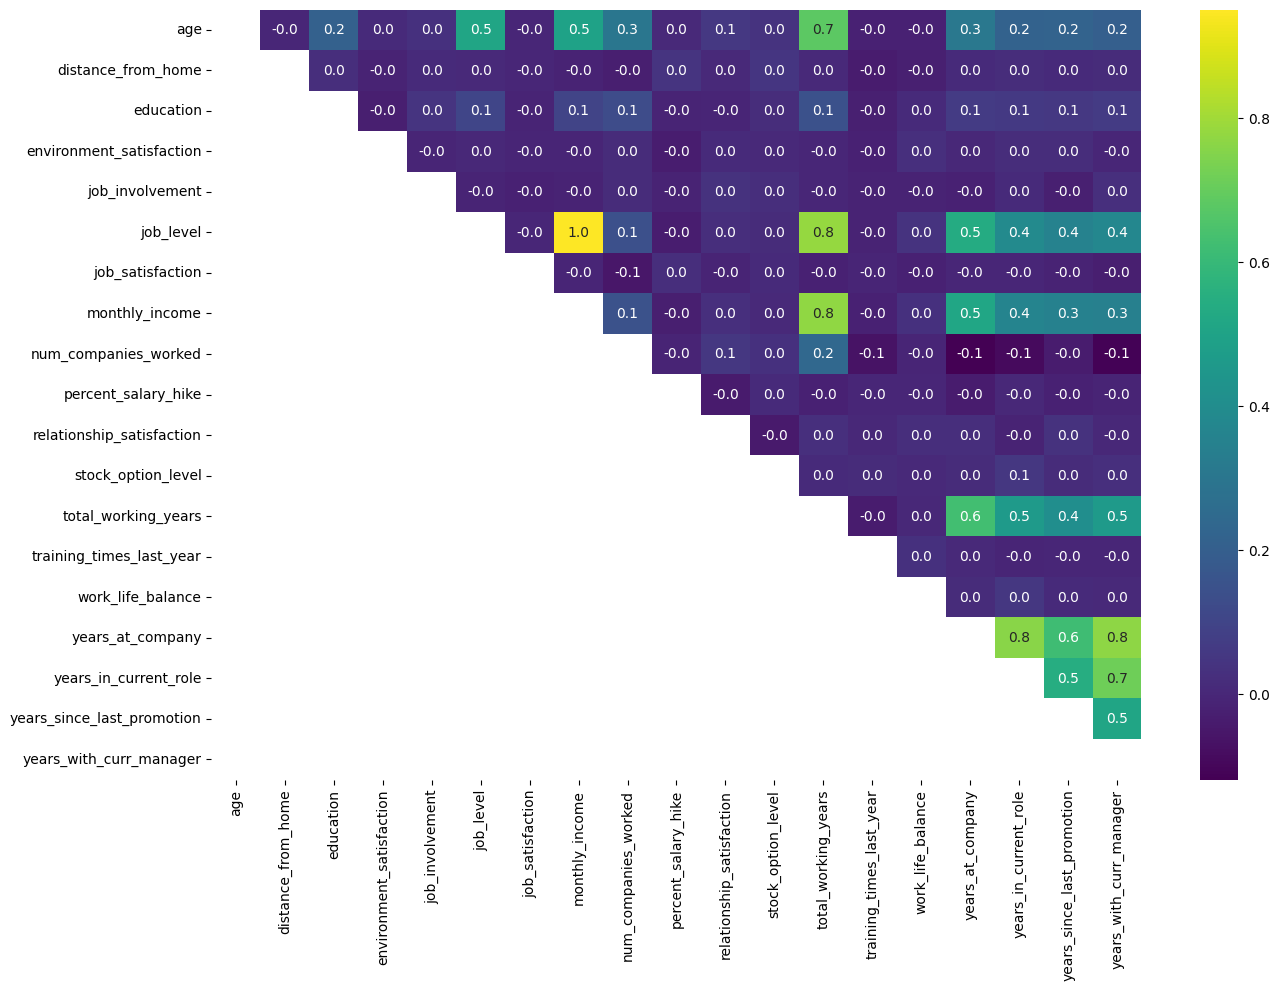

In [ ]:
def mask_upper_triangle(matrix):
    mask = np.tri(matrix.shape[0], k=0, dtype=bool)
    matrix = matrix.copy()  # avoid modifying the original
    matrix[mask] = np.nan
    return matrix

# Select numeric columns only
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(15,10))
sns.heatmap(
    mask_upper_triangle(numeric_data.corr()),
    annot=True,
    fmt=".1f",
    cmap="viridis",
    mask=False
)

plt.show()

I first calculated the correlation matrix for all numeric variables to examine linear relationships. To avoid duplicate values, I filtered only the upper triangle of the matrix (so A-B appears, but not B-A). I then applied a threshold, keeping only pairs with correlation values greater than or equal to 0.5 or less than or equal to -0.5, representing moderate to strong correlations. Finally, we reshaped the results into a tidy table for better readability and interpretation.

In [ ]:
# Compute correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Only keep upper triangle to avoid duplicates
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set threshold
threshold = 0.5

# Find pairs with correlation above threshold (positive or negative)
high_corr_pairs = (
    upper_tri.stack()  # convert to tidy format
    .reset_index()     # columns become 'level_0', 'level_1', 0
    .rename(columns={'level_0':'Variable1', 'level_1':'Variable2', 0:'Correlation'})
    .query('Correlation >= @threshold or Correlation <= -@threshold')
    .sort_values(by='Correlation', ascending=False)
    .reset_index(drop=True)
)

high_corr_pairs

,Variable1,Variable2,Correlation
0,job_level,monthly_income,0.95
1,job_level,total_working_years,0.78
2,monthly_income,total_working_years,0.77
3,years_at_company,years_with_curr_manager,0.77
4,years_at_company,years_in_current_role,0.76
5,years_in_current_role,years_with_curr_manager,0.71
6,age,total_working_years,0.68
7,total_working_years,years_at_company,0.63
8,years_at_company,years_since_last_promotion,0.62
9,years_in_current_role,years_since_last_promotion,0.55


The correlation matrix reveals several **strong relationships** among employee attributes:

- **Very strong correlation** between **`job_level`** and **`monthly_income`** (0.95), indicating that income rises almost linearly with job level.  
- **High correlations** among **`job_level`**, **`monthly_income`**, and **`total_working_years`** (0.77–0.78), suggesting that seniority, experience, and pay are tightly linked.  
- **Strong tenure-related correlations**:  
  - **`years_at_company`** with **`years_with_curr_manager`** (0.77) and **`years_in_current_role`** (0.76).  
  - **`years_in_current_role`** with **`years_with_curr_manager`** (0.71).  
- **Age** is strongly tied to **`total_working_years`** (0.68) and moderately to **`job_level`** (0.50), consistent with natural career progression.  
- **Moderate correlations** exist between tenure and promotion-related variables:  
  - **`years_at_company`** with **`years_since_last_promotion`** (0.62).  
  - **`years_in_current_role`** with **`years_since_last_promotion`** (0.55).  
  - **`years_since_last_promotion`** with **`years_with_curr_manager`** (0.51).  

The main reason for identifying highly correlated features is to detect redundancy in the dataset. When variables are very strongly correlated, they often carry overlapping information. This can introduce multicollinearity in regression models, reduce model stability, and complicate interpretability. By detecting these correlations, we can make more informed choices in later steps about feature selection, transformation, or dimensionality reduction.

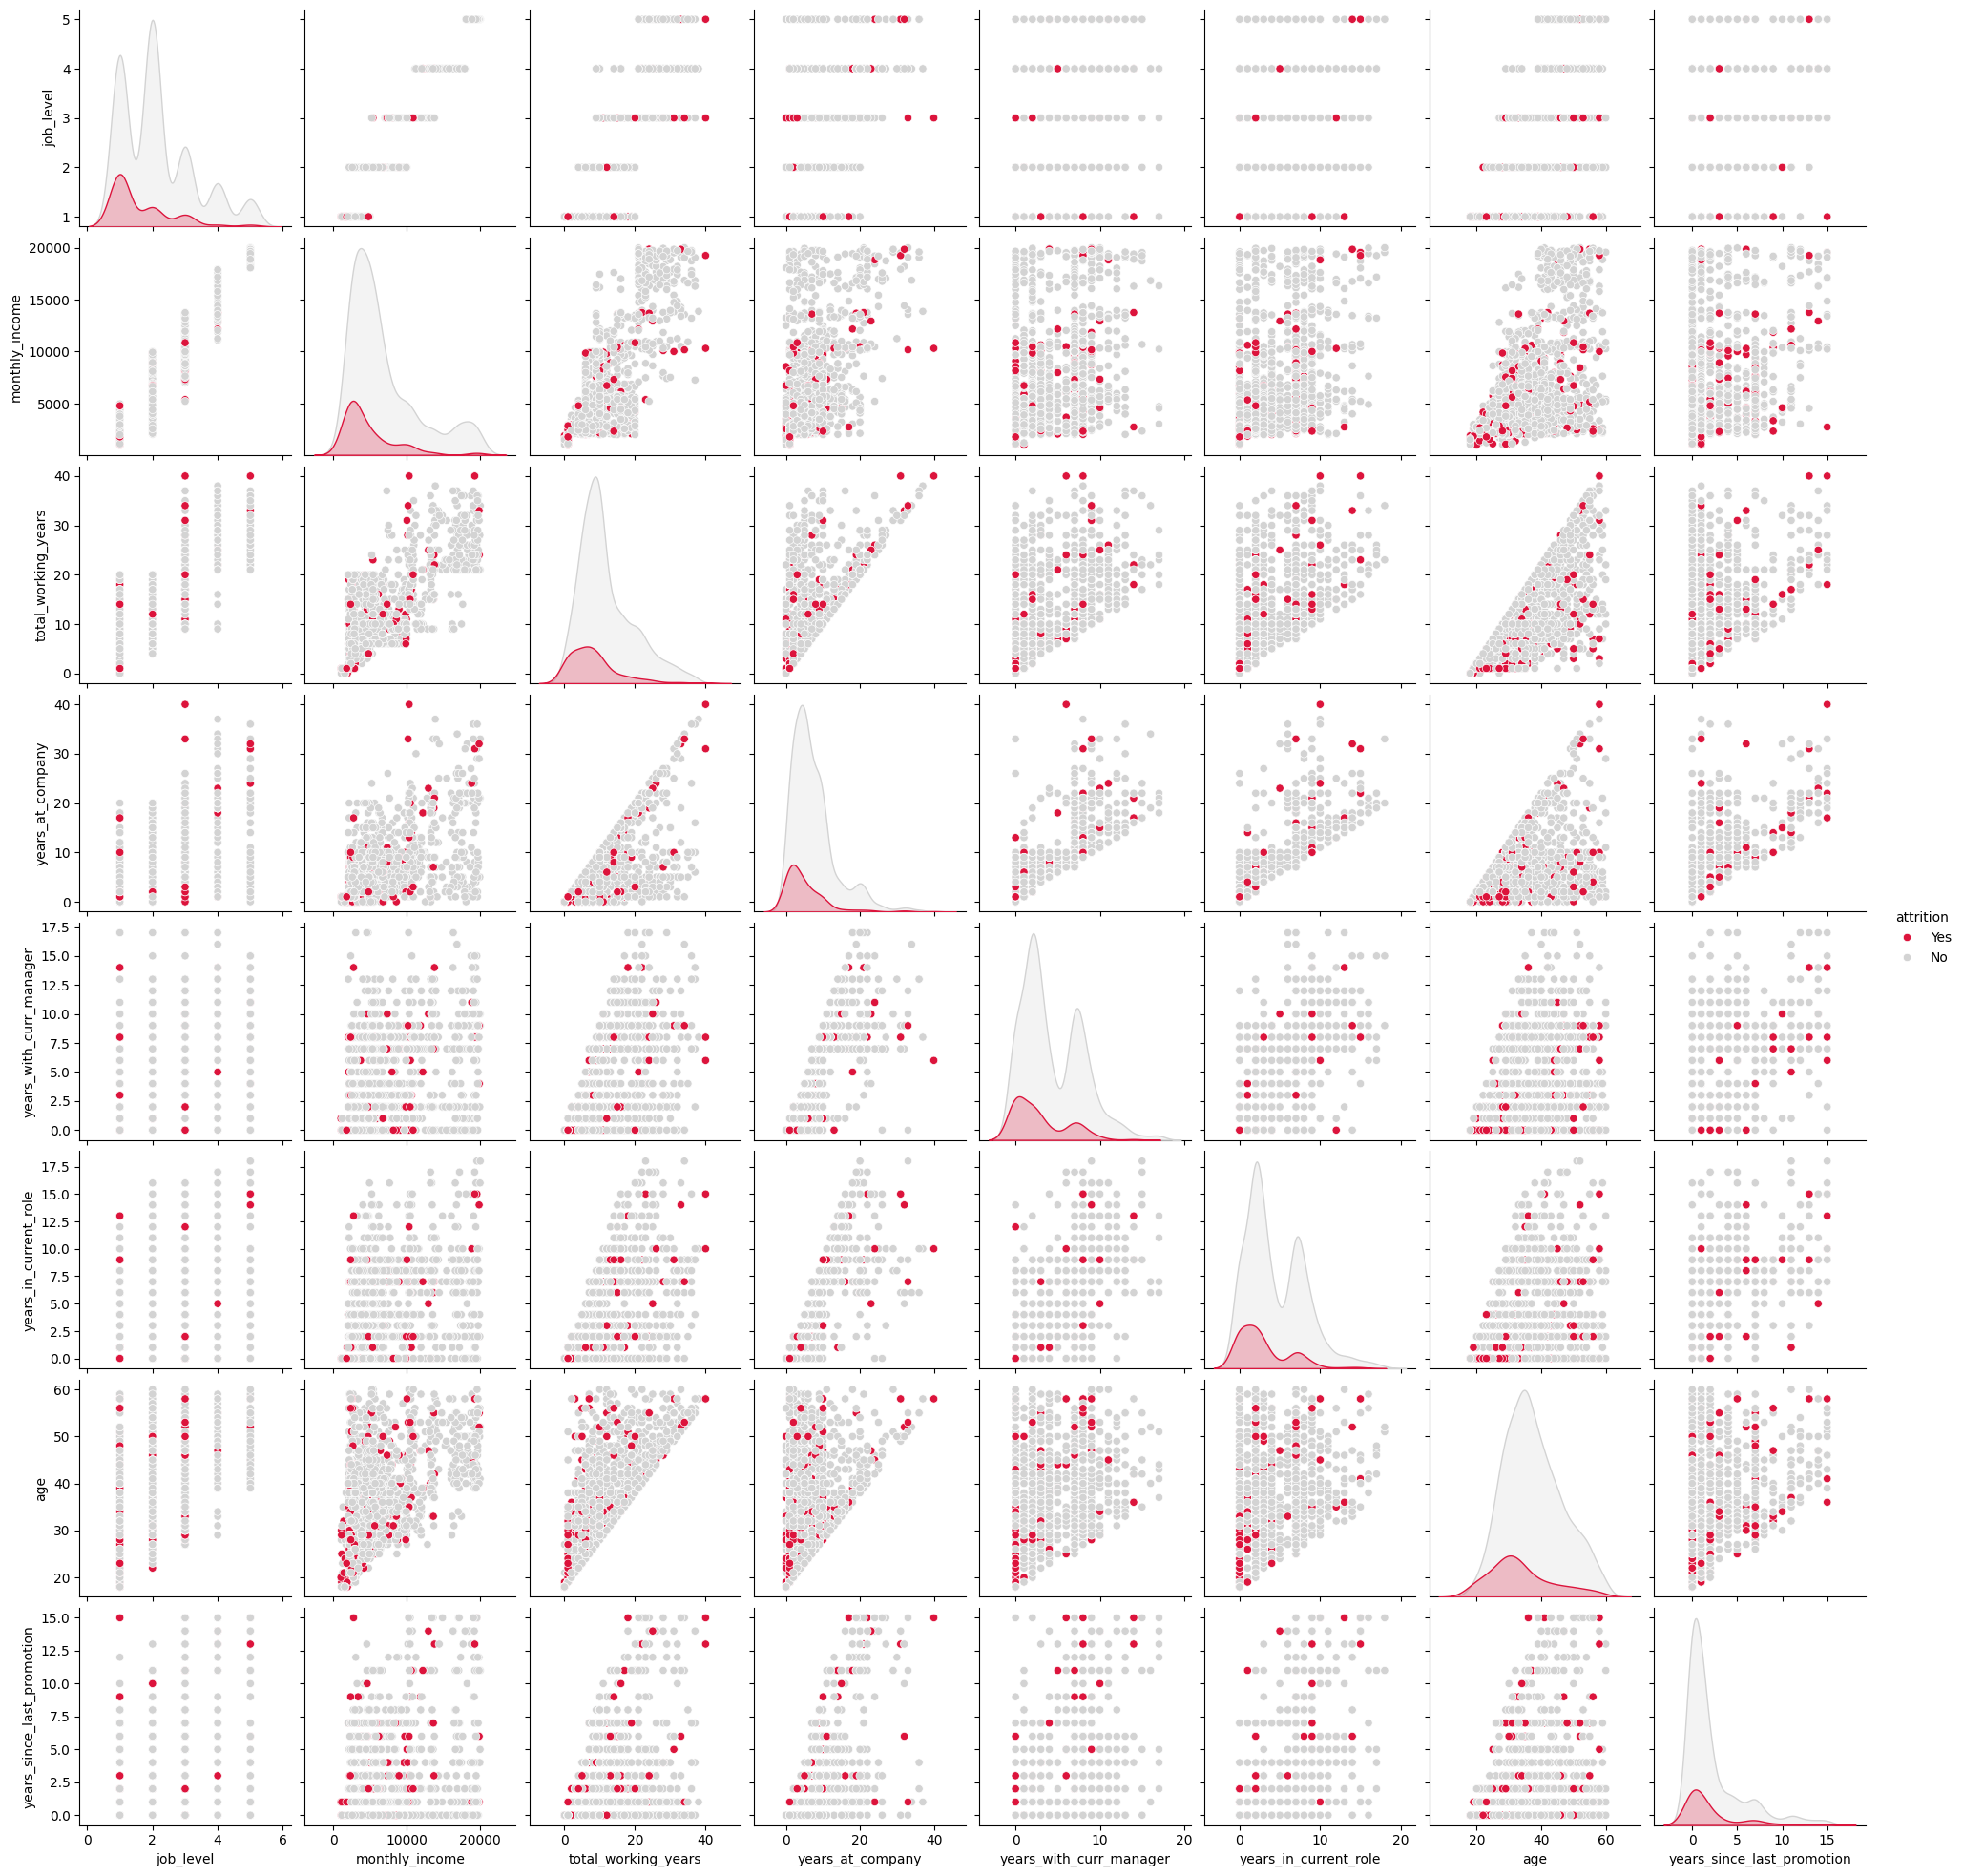

In [ ]:
# Get top correlated numeric variables
top_vars = pd.unique(high_corr_pairs[['Variable1','Variable2']].values.ravel())

# Include 'attrition' for hue
pairplot_cols = list(top_vars) + ['attrition']

# Plot pairplot with custom colors
sns.pairplot(
    data[pairplot_cols],
    hue='attrition',
    palette=custom_palette,
    diag_kind='kde'
)
plt.show()

**Observations from the Pair Plot**

The pair plot highlights **strong interrelationships** among key variables such as **`age`**, **`job_level`**, **`monthly_income`**, **`total_working_years`**, **`years_at_company`**, **`years_in_current_role`**, **`years_since_last_promotion`**, and **`years_with_curr_manager`**. These variables show **linear patterns and clustered distributions**, suggesting possible **multicollinearity** and a **shared influence** on employee attrition.



**Attrition Patterns Observed**

- **Lower `monthly_income`**  
  Employees with lower salaries are more likely to leave, underscoring the importance of compensation in retention.  

- **Fewer `years_since_last_promotion`**  
  Higher attrition is observed among employees who haven’t been promoted recently, pointing to career progression as a critical factor.  

- **Shorter tenure with `years_with_curr_manager`**  
  Employees who have spent less time with their manager tend to leave more often, suggesting the impact of managerial relationships and early-stage support.  

- **Early career stage (`total_working_years`, `job_level`)**  
  Attrition is concentrated among employees with fewer total working years and lower job levels, indicating higher turnover risk among junior staff.  

- **Stagnation in `years_in_current_role`**  
  Longer time in the same role without advancement is linked to higher attrition, highlighting the need for **role mobility and skill development opportunities**.  


# **Step 5: Machine Learning Model**

## 5.1. Lasso regression for feature selection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   department                  1470 non-null   object
 4   distance_from_home          1470 non-null   int64 
 5   education                   1470 non-null   int64 
 6   education_field             1470 non-null   object
 7   environment_satisfaction    1470 non-null   int64 
 8   gender                      1470 non-null   object
 9   job_involvement             1470 non-null   int64 
 10  job_level                   1470 non-null   int64 
 11  job_role                    1470 non-null   object
 12  job_satisfaction            1470 non-null   int64 
 13  marital_status              1470 non-null   obje

Wr are going to use LASSO regression here for feature selection because it can shrink some coefficients to zero, allowing us to identify the most important variables for predicting attrition while keeping interpretability.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron


### Prepare data

In [ ]:
# Separate features and target
X = data.drop("attrition", axis=1)
y = data["attrition"]

# Encode target (Yes/No → 1/0)
y = LabelEncoder().fit_transform(y)

# Label Encoding
le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':   # only apply to categorical (string) columns
        X[col] = le.fit_transform(X[col])

# Check the changed df
X.head()

,age,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,2,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,11,1,0,8,0,1,6,4,0,5
1,49,1,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,15,2,0,7,3,3,0,0,0,0
3,33,1,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,3,1,1,3,1,2,2,1,3468,9,0,12,4,1,6,3,3,2,2,2,2


### Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Scale data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LASSO Regression with CV

In [ ]:
# LassoCV automatically finds the best alpha (regularization strength)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

### Check selected features

In [ ]:
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef != 0].sort_values(key=abs, ascending=False)

print("Selected features:\n", selected_features)

Selected features:
 over_time                     0.08
age                          -0.05
environment_satisfaction     -0.04
job_involvement              -0.04
num_companies_worked          0.04
job_satisfaction             -0.04
marital_status                0.03
distance_from_home            0.03
years_since_last_promotion    0.03
years_with_curr_manager      -0.03
department                    0.03
stock_option_level           -0.03
years_in_current_role        -0.02
work_life_balance            -0.02
total_working_years          -0.02
relationship_satisfaction    -0.02
job_level                    -0.01
gender                        0.01
training_times_last_year     -0.01
job_role                     -0.01
monthly_income               -0.01
percent_salary_hike          -0.00
education_field              -0.00
dtype: float64


### Evaluate model

In [ ]:
y_pred = lasso.predict(X_test_scaled) > 0.5  # thresholding regression output into classification

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       247
           1       1.00      0.17      0.29        47

    accuracy                           0.87       294
   macro avg       0.93      0.59      0.61       294
weighted avg       0.89      0.87      0.83       294



In [ ]:
# Get Lasso coefficients (from training data)
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Show variables with zero coefficient
zero_coef_vars = coef[coef == 0].index
print("Variables with zero coefficient (can be dropped):")
print(zero_coef_vars)

# Drop zero-coefficient variables from train and test sets
X_train_selected = X_train.drop(columns=zero_coef_vars)
X_test_selected = X_test.drop(columns=zero_coef_vars)

Variables with zero coefficient (can be dropped):
Index(['business_travel', 'education', 'years_at_company'], dtype='object')


We will drop features with zero coefficients and keep only the selected features for model training.

## 6.2. Model Comparison

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), SGDClassifier(), Perceptron()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost', 'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train_selected, y_train)
    y_pred = i.predict(X_test_selected)
    accuracy.append(accuracy_score(y_test, y_pred))

    if hasattr(i, "predict_proba"):
        y_pred_proba = i.predict_proba(X_test_selected)[:, 1]  # Use the probability of the positive class
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    else:
        #roc_auc.append(None)
        y_pred_proba = i.decision_function(X_test_selected)
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.85,0.72
1,SGD Classifier,0.84,0.64
2,SVC,0.84,0.48
3,Perceptron,0.84,0.64
4,Gradient Boosting,0.84,0.80
5,Ada Boost,0.83,0.80
6,Random Forest,0.83,0.82
7,KNN,0.80,0.51
8,Decision Tree,0.79,0.64
9,Naive Bayes,0.77,0.76


While accuracy provides a quick overview of a model's performance, it can be misleading when dealing with imbalanced datasets, such as predicting employee attrition where the number of employees leaving is relatively small. To address this, we complement accuracy with the ROC AUC metric, which offers a more reliable measure of the model's ability to distinguish between employees who are likely to leave and those who are not.

In [ ]:
# Sort the DataFrame by Accuracy descending
model_comparison_sorted = model_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Create scatter plot
fig = px.scatter(
    model_comparison_sorted,
    x='Model',
    y=['Accuracy', 'ROC AUC'],
    title='Model Comparison',
    labels={'value': 'Score', 'variable': 'Metric'},
    category_orders={'Model': model_comparison_sorted['Model'].tolist()}  # ensure left-to-right order
)

fig.show()

The chart compares the performance of multiple machine learning models using **Accuracy** (blue) and **ROC AUC** (red) as evaluation metrics.

**Logistic Regression** and **SGD Classifier** achieve the highest scores, with accuracy values clustering around 0.84-0.85. These models stand out as strong candidates for reliable classification performance.

## 6.3. Model 1 - Random Forest

### Model Building & Feature Importance Analysis

In [ ]:
model = RandomForestClassifier(max_features='sqrt', n_estimators=100)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:,1]
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

feature_importance = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))

fig = px.scatter(
    feature_importance,
    x="Feature",
    y="Importance",
    color="Feature",
    title="Feature Importance",
    labels={"Importance": "Importance", "Feature": "Feature"},
    category_orders={"Feature": feature_importance["Feature"].tolist()},  # keep order
)

fig.update_traces(marker=dict(size=10))

fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance",
    font={"family": "Arial", "size": 12},
    showlegend=False
)

fig.update_xaxes(tickangle=60)

fig.show()

Accuracy Score: 0.8367346938775511
ROC AUC Score: 0.8104487897321043


<Figure size 1000x500 with 0 Axes>

Overall, most features show only modest influence on predicting attrition, with importance values generally below 0.1. <br>
The model relies most heavily on financial factors (Monthly Income), career stage (Total Working Years, Age), and to some extent on work conditions (Overtime, Distance From Home) to predict attrition. <br>
Demographic variables (Gender, Department) play almost no role, suggesting they are not strong predictors of attrition in this dataset.

### Predicting Most Risky Personels

In [ ]:

rf = RandomForestClassifier(max_features='sqrt', n_estimators=100)

rf.fit(X_train_selected, y_train)

y_pred = rf.predict(X_test_selected)


y_pred_prob = rf.predict_proba(X_test_selected)

y_pred_prob = y_pred_prob[:, 1]

y_pred_prob = pd.DataFrame(y_pred_prob)

y_pred_prob.columns = ['Probability']

y_pred_prob['Attrition Prediction'] = np.array(y_pred)

y_pred_prob['True Value'] = np.array(y_test)
y_pred_prob['Employee ID'] = X_test_selected.index

y_pred_prob = y_pred_prob.sort_values(by='Probability', ascending=False)

y_pred_prob = y_pred_prob.reset_index(drop=True)

y_pred_prob

,Probability,Attrition Prediction,True Value,Employee ID
0,0.94,1,1,688
1,0.85,1,0,301
2,0.76,1,1,911
3,0.72,1,1,711
4,0.62,1,0,1311
...,...,...,...,...
289,0.01,0,0,1232
290,0.01,0,0,594
291,0.01,0,0,1040
292,0.01,0,0,137


### Model Evaluation

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Plot ROC curve and AUC score of RF Model
fpr, tpr, threshold = roc_curve(y_test,rf.predict_proba(X_test_selected)[:,1])

fig = px.line(x=fpr,y=tpr,
        title="ROC Curve of RF Model",
        #color_discrete_sequence=["pink"],
        #template="plotly_dark"
              )

fig.update_layout(xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",)

fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy',name=f"AUC: {roc_auc_score(y_test,rf.predict_proba(X_test_selected)[:,1]):.2f}"))
fig.show()

Having a closer look at the ROC AUC index, we can notice the pronounced pattern of trade-off between TPR and FPR at different thresholds of testing, all of which accrue up to a whopping 0.8 in aggregate area.

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

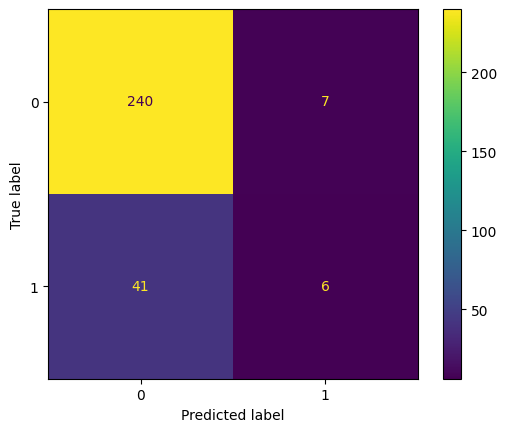

In [ ]:
RF_co_ma = confusion_matrix(y_test, y_pred)
RF_co_ma = ConfusionMatrixDisplay(confusion_matrix = RF_co_ma)
RF_co_ma.plot()

Confusion matrix show the false positive and false negative rate as followed:
- False positive: 2
- False negative: 61
- True positive: 10
- True negative: 334
<br>

Hereby, further calculations of accuracy including precision, recall and f1-score can be conducted.



### Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



The Recall and F1-Score are relatively low, which can be attributed to the imbalance between negative and positive value of the feature in the examined dataset.

## 6.4. Model 2 - SGD Classifier

In [ ]:
df2 = data.copy()

# Drop zero-coefficient variables from the LASSO Regression step
df2 = df2.drop(columns=zero_coef_vars)

### Encoding Non-Numeric Features

In [ ]:
def dummies(df):
	list=[]
	for col in df.select_dtypes(exclude=np.number).columns:
		dummy = pd.get_dummies(df[col],prefix=col,drop_first=True)
		list.append(dummy)

	df=df.drop([i for i in df.select_dtypes(exclude=np.number).columns],axis=1)

	for dummy_df in list:
		df=pd.concat([df,dummy_df],axis=1)
	return df

In [ ]:
df2 = dummies(df2)

In [ ]:
df2.head()

,age,distance_from_home,environment_satisfaction,job_involvement,job_level,job_satisfaction,monthly_income,num_companies_worked,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition_Yes,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,41,1,2,3,2,4,5993,8,11,1,0,8,0,1,4,0,5,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,8,3,2,2,2,5130,1,23,4,1,10,3,3,7,1,7,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,2,4,2,1,3,2090,6,15,2,0,7,3,3,0,0,0,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,3,4,3,1,3,2909,1,11,3,0,8,3,3,7,3,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,2,1,3,1,2,3468,9,12,4,1,6,3,3,2,2,2,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
df2.shape

(1470, 37)

### Standardizing Numeric Variables

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df2.drop('attrition_Yes',axis=1))

StandardScaler()

In [ ]:
scaled_features_df2 = scaler.transform(df2.drop('attrition_Yes',axis=1))

In [ ]:
df2_feat = pd.DataFrame(scaled_features_df2,columns=df2.drop("attrition_Yes",axis=1).columns)
df2_feat.head()

,age,distance_from_home,environment_satisfaction,job_involvement,job_level,job_satisfaction,monthly_income,num_companies_worked,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_in_current_role,years_since_last_promotion,years_with_curr_manager,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,0.45,-1.01,-0.66,0.38,-0.06,1.15,-0.11,2.13,-1.15,-1.58,-0.93,-0.42,-2.17,-2.49,-0.06,-0.68,0.25,-1.37,1.52,1.19,-0.35,-0.68,-0.24,-0.31,-1.22,-0.19,-0.46,-0.27,-0.33,-0.24,-0.50,1.87,-0.24,-0.92,1.46,1.59
1,1.32,-0.15,0.25,-1.03,-0.06,-0.66,-0.29,-0.68,2.13,1.19,0.24,-0.16,0.16,0.34,0.76,-0.37,0.81,0.73,-0.66,1.19,-0.35,-0.68,-0.24,-0.31,0.82,-0.19,-0.46,-0.27,-0.33,-0.24,2.01,-0.53,-0.24,1.09,-0.69,-0.63
2,0.01,-0.89,1.17,-1.03,-0.96,0.25,-0.94,1.32,-0.06,-0.66,-0.93,-0.55,0.16,0.34,-1.17,-0.68,-1.16,0.73,-0.66,-0.84,-0.35,-0.68,4.11,-0.31,0.82,-0.19,2.16,-0.27,-0.33,-0.24,-0.50,-0.53,-0.24,-0.92,1.46,1.59
3,-0.43,-0.76,1.17,0.38,-0.96,0.25,-0.76,-0.68,-1.15,0.27,-0.93,-0.42,0.16,0.34,0.76,0.25,-1.16,0.73,-0.66,1.19,-0.35,-0.68,-0.24,-0.31,-1.22,-0.19,-0.46,-0.27,-0.33,-0.24,2.01,-0.53,-0.24,1.09,-0.69,1.59
4,-1.09,-0.89,-1.58,0.38,-0.96,-0.66,-0.64,2.53,-0.88,1.19,0.24,-0.68,0.16,0.34,-0.62,-0.06,-0.60,0.73,-0.66,-0.84,-0.35,1.47,-0.24,-0.31,0.82,-0.19,2.16,-0.27,-0.33,-0.24,-0.50,-0.53,-0.24,1.09,-0.69,-0.63


### Train Split Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2_feat,
                                                    df2['attrition_Yes'], test_size=0.2,
                                                    random_state=101)

### Initialize and train SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

### Analysing Feature Importance

In [ ]:
feature_importance = sgd.coef_[0]

feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

importance_df = importance_df.reindex(importance_df['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

import plotly.express as px

fig = px.bar(
    importance_df,
    x='Coefficient',
    y='Feature',
    orientation='h',
    title='Feature Coefficients in Logistic Regression',
    #template='plotly_dark'
)

fig.show()

In [ ]:
importance_df.head(10)

,Feature,Coefficient
0,department_Research & Development,1.65
1,job_role_Human Resources,1.44
2,department_Sales,1.25
3,education_field_Medical,-1.24
4,over_time_Yes,1.02
5,job_involvement,-0.99
6,education_field_Other,-0.94
7,environment_satisfaction,-0.90
8,job_role_Laboratory Technician,0.86
9,years_since_last_promotion,0.79


In [ ]:
importance_df.loc[importance_df["Feature"]=="monthly_income"]

,Feature,Coefficient
16,monthly_income,0.58


### Predict Most Risky Personels

In [ ]:
predictions = sgd.predict(X_test)

In [ ]:
predictions_prob = sgd.predict_proba(X_test)

In [ ]:
pred_prob=predictions_prob[:,1]

pred_prob = pd.DataFrame(pred_prob,columns=["Probability of Attrition"])

pred_prob["Predicted Attrition"]=predictions

pred_prob["Employee ID"] = X_test.index


In [ ]:
pred_prob = pred_prob.sort_values(by="Probability of Attrition",ascending=False)
pred_prob.reset_index(inplace=True,drop=True)
pred_prob


,Probability of Attrition,Predicted Attrition,Employee ID
0,0.99,True,422
1,0.99,True,1171
2,0.99,True,734
3,0.97,True,1396
4,0.93,True,915
...,...,...,...
289,0.00,False,714
290,0.00,False,534
291,0.00,False,257
292,0.00,False,25


### Model Evaluation

In [ ]:
# Plot ROC curve and AUC score of LG Model
fpr, tpr, threshold = roc_curve(y_test, sgd.predict_proba(X_test)[:,1])

fig = px.line(x=fpr,y=tpr,
        title="ROC Curve of LG Model",
        color_discrete_sequence=["pink"],
        #template="plotly_dark"
              )

fig.update_layout(xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",)

fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy', fillcolor='pink',name=f"AUC: {roc_auc_score(y_test, sgd.predict_proba(X_test)[:,1]):.2f}"))
fig.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

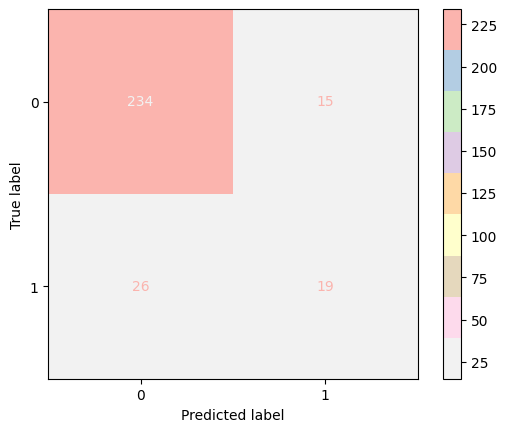

In [ ]:
LG_co_ma = confusion_matrix(y_test, predictions)

LG_co_ma = ConfusionMatrixDisplay(confusion_matrix = LG_co_ma)

LG_co_ma.plot(cmap="Pastel1_r")

### Classification Report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.90      0.94      0.92       249
        True       0.56      0.42      0.48        45

    accuracy                           0.86       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294

